In [82]:
!pip install pillow pytesseract pyautogui pynput
!brew install tesseract

==> Downloading https://formulae.brew.sh/api/formula.jws.json
######################################################################### 100.0%
==> Downloading https://formulae.brew.sh/api/cask.jws.json
######################################################################### 100.0%
To reinstall 5.3.3, run:
  brew reinstall tesseract


In [83]:
from PIL import Image, ImageGrab
import pytesseract
import pyautogui
import time
from pynput.mouse import Listener


In [84]:
class ClickListener:
    def __init__(self):
        self.coordinates = None
        self.keep_listening = True

    def on_click(self, x, y, button, pressed):
        if pressed:
            self.coordinates = int(x), int(y)
            self.keep_listening = False
            return False  # Stop the listener

    def get_coordinates(self):
        with Listener(on_click=self.on_click) as listener:
            listener.join()  # This will block until on_click returns False
        return self.coordinates


In [85]:
def capture_screen():
    # Create an instance of ClickListener
    click_listener = ClickListener()
    
    # Get the mouse coordinates after the first click
    x1, y1 = click_listener.get_coordinates()
    x2, y2 = click_listener.get_coordinates()
    
    # Print the coordinates
    # print("First click coordinates:", x1, y1)
    print(f'Rectangle: x1: {x1} y1: {y1} x2: {x2} y2: {y2}')
    image = ImageGrab.grab(bbox=(x1, y1, x2, y2))
    return image

This process is not trusted! Input event monitoring will not be possible until it is added to accessibility clients.
This process is not trusted! Input event monitoring will not be possible until it is added to accessibility clients.


Rectangle: x1: 390 y1: 482 x2: 1054 y2: 629


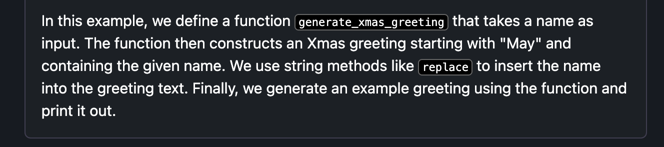

In [93]:

image = capture_screen()
display(image)

In [94]:
text = pytesseract.image_to_string(image)
# And with this text you can call the LLM
PROMPT_DEFAULT = "Help me with this: \n"
prompt = PROMPT_DEFAULT + text
print(prompt)

Help me with this: 
In this example, we define a function (generate_xmas_greeting) that takes a name as
input. The function then constructs an Xmas greeting starting with "May" and
containing the given name. We use string methods like (replace to insert the name
into the greeting text. Finally, we generate an example greeting using the function and
print it out.

